In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Calibration data

In [2]:
#reading static data for calibration

columns = ['gx', 'gy', 'gz', 'ax', 'ay', 'az', 'temp']

with open('./static.txt', 'r') as f:
    lines = f.readlines()
    lines = [[float(_x.strip()) for _x in x.split(',')] for x in lines]
    data_static = pd.DataFrame(data=lines, columns=columns)
data_static.head()

,gx,gy,gz,ax,ay,az,temp
0,-92.0,77.0,-15.0,4059.0,34.0,250.0,28.92
1,-97.0,81.0,-12.0,4063.0,31.0,250.0,28.91
2,-93.0,76.0,-15.0,4056.0,35.0,240.0,28.91
3,-91.0,78.0,-14.0,4061.0,40.0,250.0,28.90
4,-90.0,76.0,-18.0,4055.0,36.0,241.0,28.91


In [3]:
calibration_g = np.array([
    np.average(data_static['gx'].values),
    np.average(data_static['gy'].values),
    np.average(data_static['gz'].values)
])
calibration_a = np.array([
    np.average(data_static['ax'].values),
    np.average(data_static['ay'].values),
    np.average(data_static['az'].values)
])

calibration_g, calibration_a

(array([-92.85934697,  76.75026911, -14.93720847]),
 array([4053.9303911 ,   35.64155005,  248.0696089 ]))

# Data Without Calibration

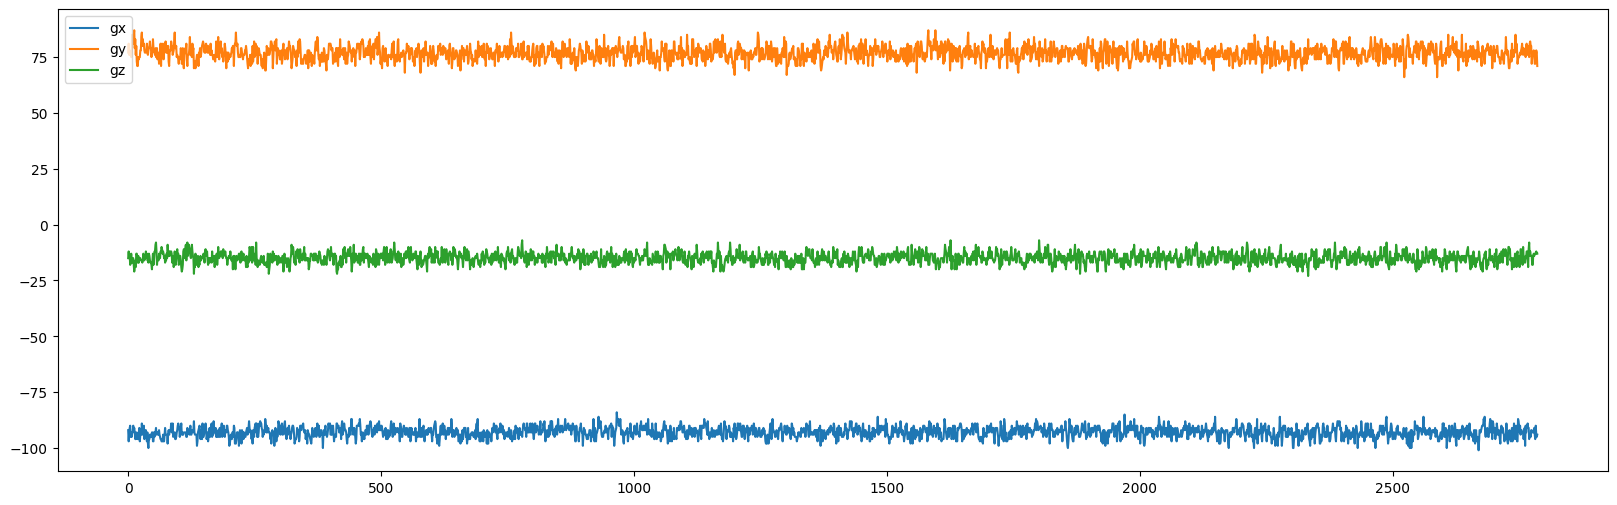

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(data_static[['gx', 'gy', 'gz']], label=['gx', 'gy', 'gz'])
plt.legend(loc="upper left")
plt.show()

# Data with calibration

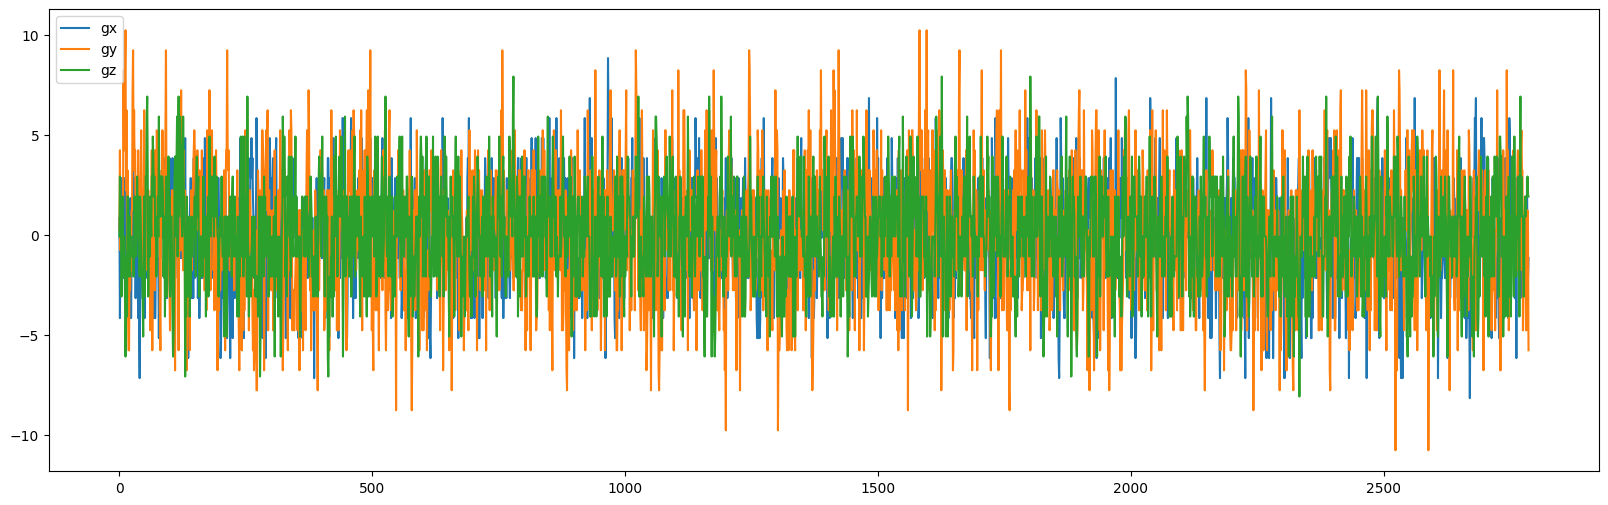

In [5]:
plt.figure(figsize=(20, 6))
plt.plot(data_static[['gx', 'gy', 'gz']] - calibration_g, label=['gx', 'gy', 'gz'])
plt.legend(loc="upper left")
plt.show()

# Data for movement

In [6]:
#reading static data for calibration

columns = ['gx', 'gy', 'gz', 'ax', 'ay', 'az', 'temp']
sampling_rate = 250

with open('./movement.txt', 'r') as f:
    lines = f.readlines()
    lines = [[float(_x.strip()) for _x in x.split(',')] for x in lines]
    data_movement = pd.DataFrame(data=lines, columns=columns)
data_movement.head()

,gx,gy,gz,ax,ay,az,temp
0,-94.0,75.0,-17.0,4048.0,121.0,280.0,29.44
1,-93.0,77.0,-14.0,4051.0,123.0,275.0,29.45
2,-92.0,83.0,-14.0,4051.0,112.0,274.0,29.44
3,-93.0,77.0,-14.0,4049.0,114.0,283.0,29.45
4,-88.0,81.0,-16.0,4051.0,128.0,265.0,29.46


In [7]:
# calibration
data_movement_gyro = data_movement[['gx', 'gy', 'gz']] - calibration_g
data_movement_accl = data_movement[['ax', 'ay', 'az']]
data_temp = data_movement['temp']


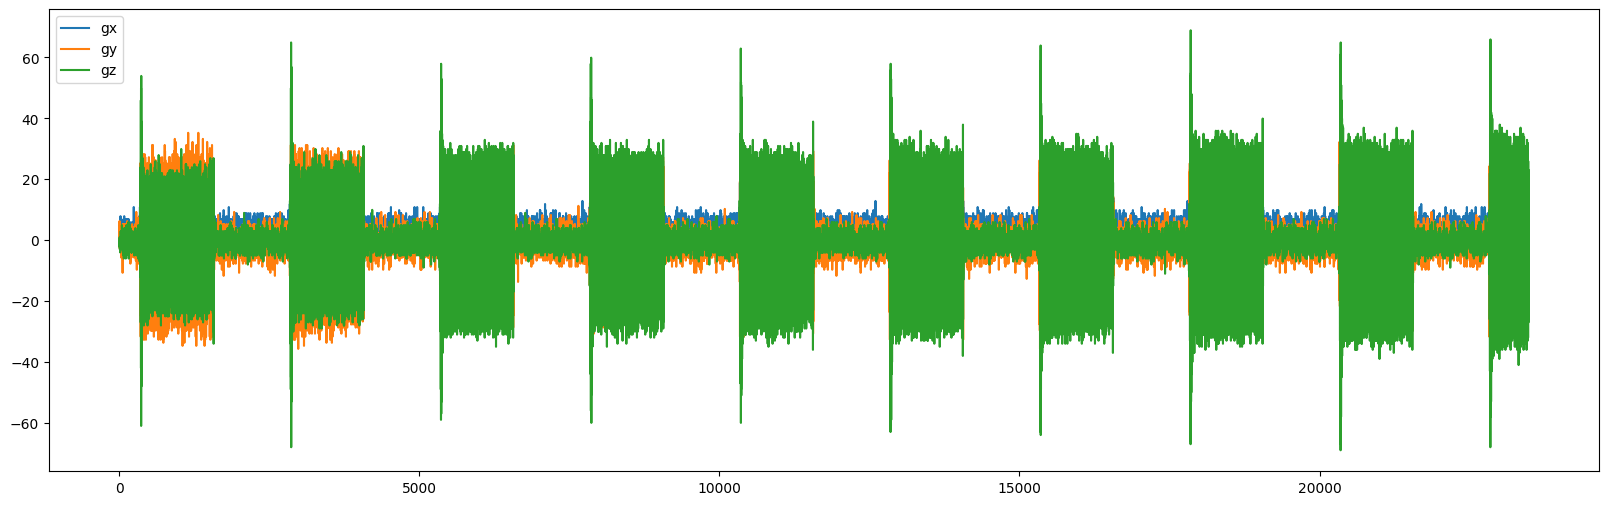

In [8]:
plt.figure(figsize=(20, 6))
plt.plot(data_movement_gyro, label=data_movement_gyro.columns)
plt.legend(loc="upper left")
plt.show()

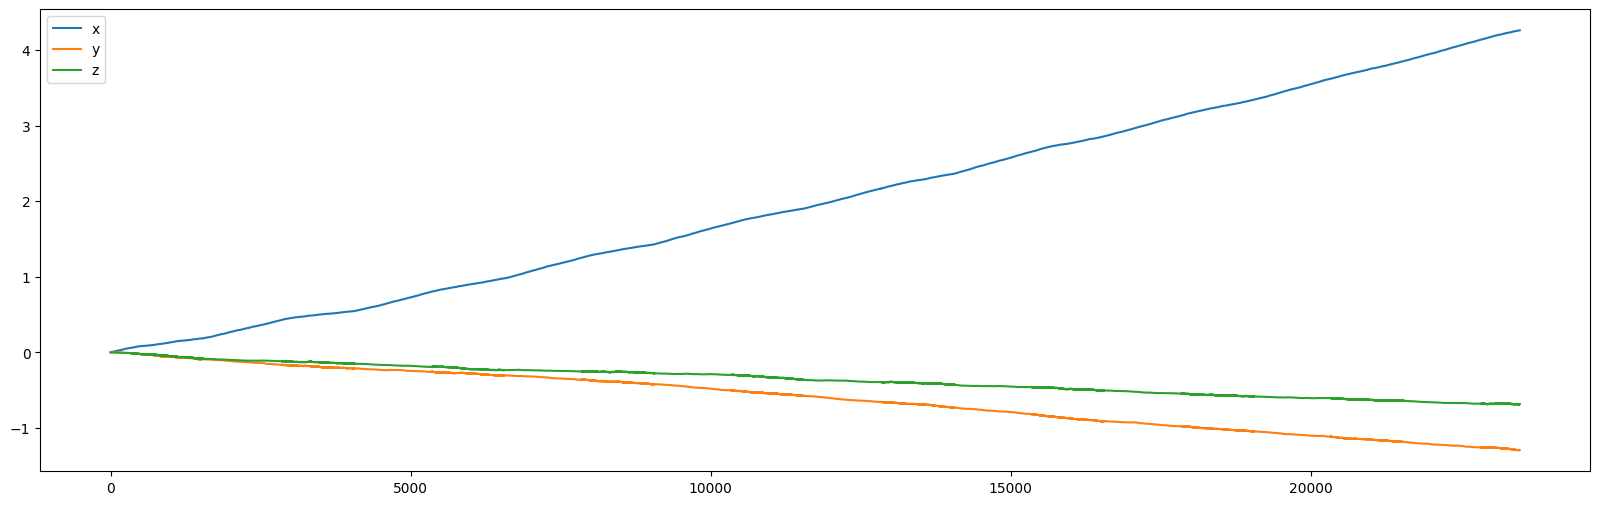

In [28]:
data_g_deg = data_movement_gyro/(65.5*sampling_rate)
#integrate angle
data_angle_g = []
for d in data_g_deg.values:
    if len(data_angle_g) == 0:
        data_angle_g.append(d)
    else:
        data_angle_g.append(data_angle_g[-1] + d)

plt.figure(figsize=(20, 6))
plt.plot(data_angle_g, label=['x', 'y', 'z'])
plt.legend(loc="upper left")
plt.show()

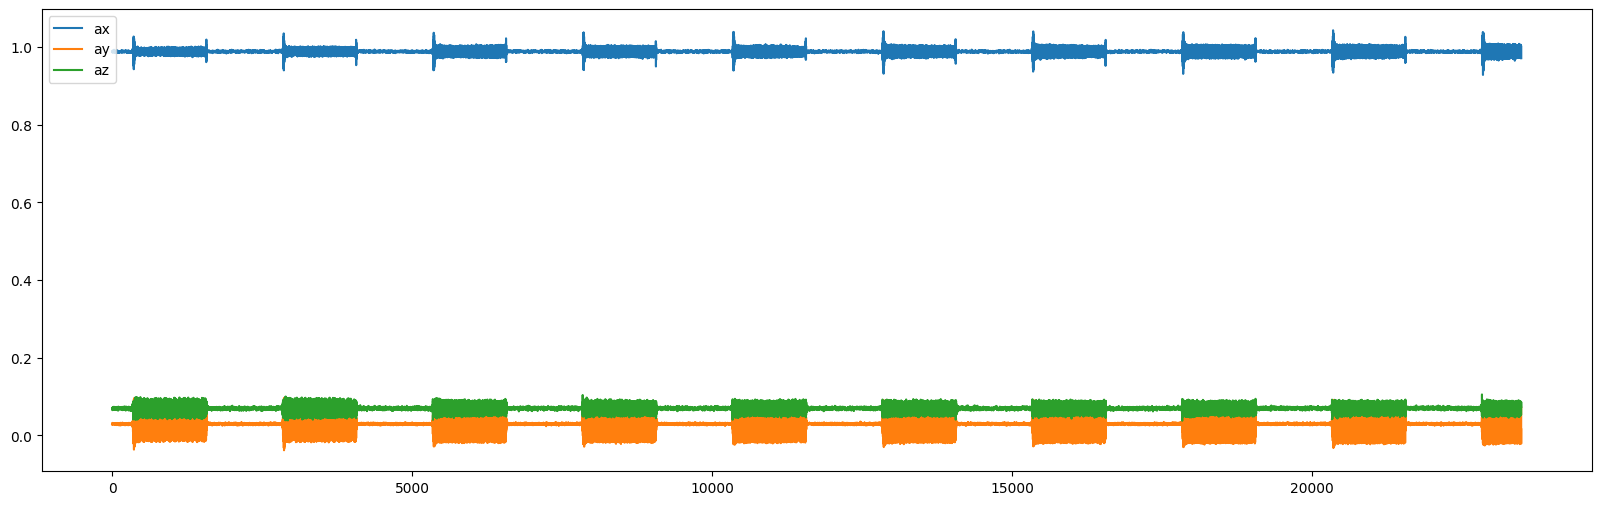

/tmp/ipykernel_43312/2946518178.py:6: RuntimeWarning: divide by zero encountered in divide
  angle_acc = np.arctan(data_movement_accl['ax'].values / data_movement_accl['ay'].values)


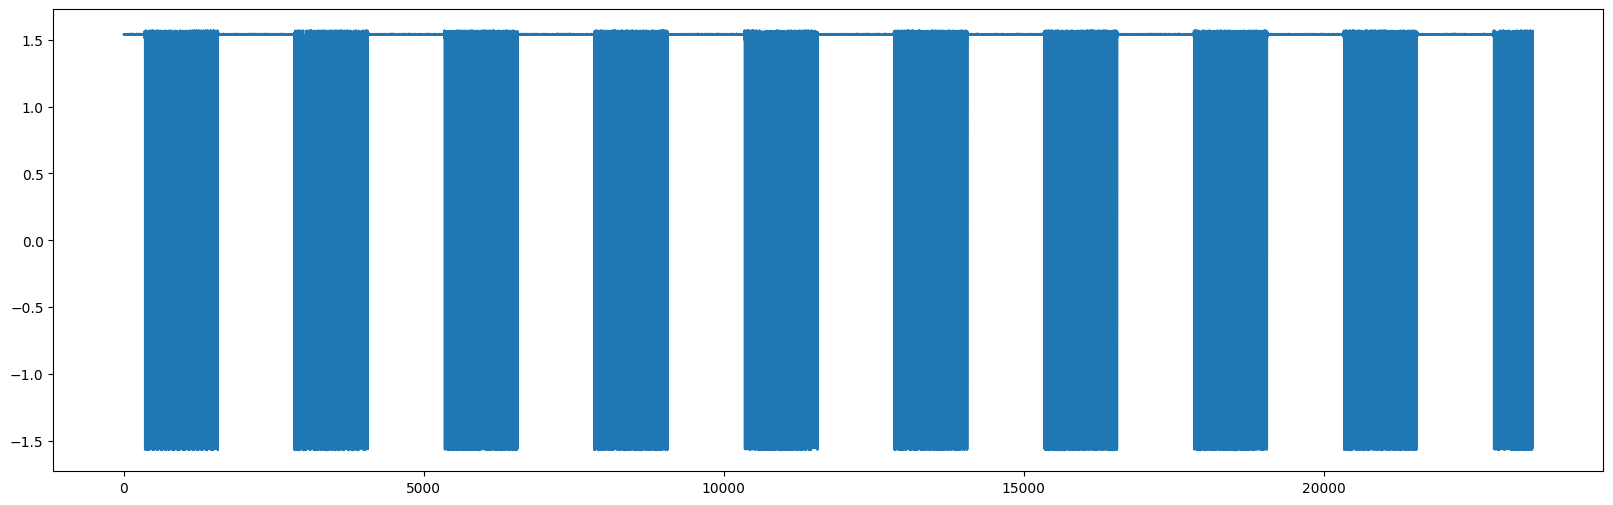

In [10]:


plt.figure(figsize=(20, 6))
plt.plot(data_movement_accl / 4096, label=data_movement_accl.columns)
plt.legend(loc="upper left")
plt.show()

angle_acc = np.arctan(data_movement_accl['ax'].values / data_movement_accl['ay'].values)

plt.figure(figsize=(20, 6))
plt.plot(angle_acc)
plt.show()

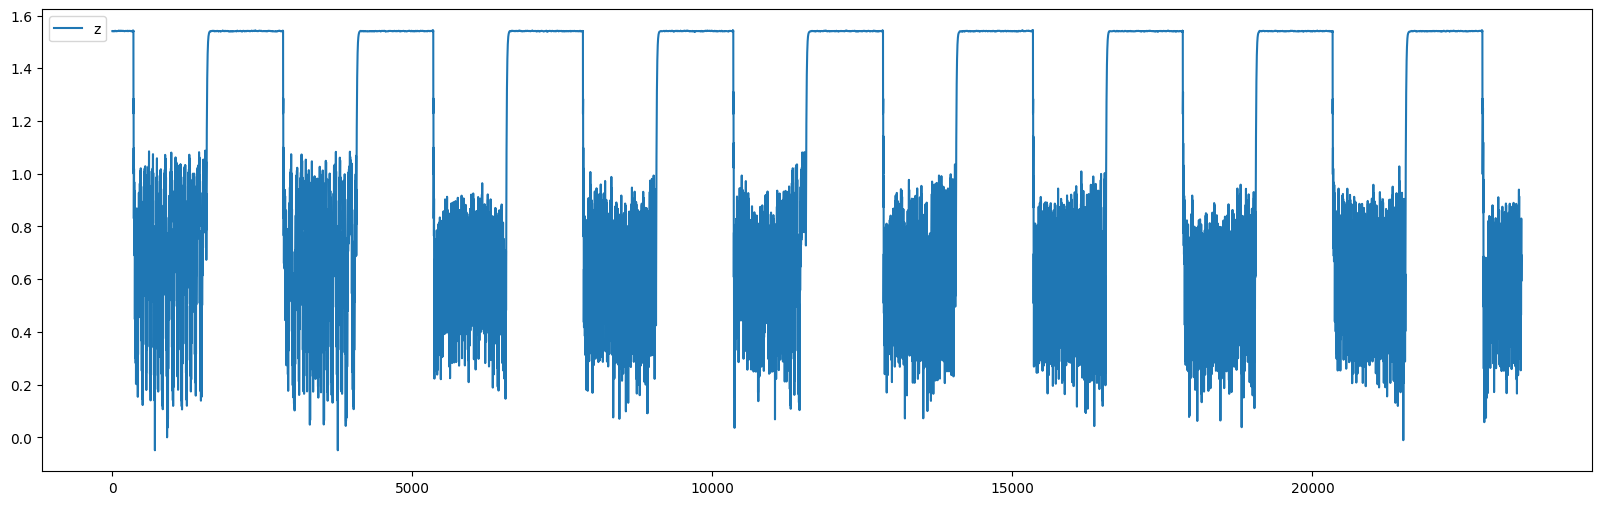

In [27]:
#integrate angle
data_angle_gz = []
for i in range(data_g_deg.shape[0]):
    if i == 0:
        data_angle_gz.append(angle_acc[i])
    else:
        data_angle_gz.append(0.9*(data_angle_gz[-1] + data_g_deg.iloc[i][2]) + 0.1 * angle_acc[i])

plt.figure(figsize=(20, 6))
plt.plot(data_angle_gz, label='z')
plt.legend(loc="upper left")
plt.show()

In [26]:
angle_acc

array([ 1.54091392,  1.54044278,  1.54315587, ...,  1.55350628,
       -1.54893102,  1.55496055])